<a href="https://www.kaggle.com/code/lakshmipriya190803/beginner-friendly-eda-and-time-series-forecasting?scriptVersionId=158430775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploring Daily Dollar Price Trends: An EDA and Time Series Forecasting Journey 

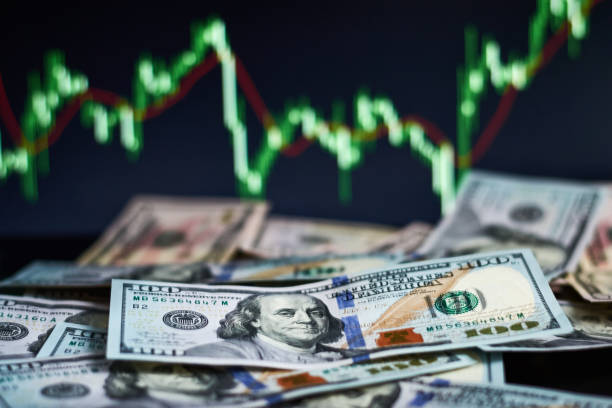

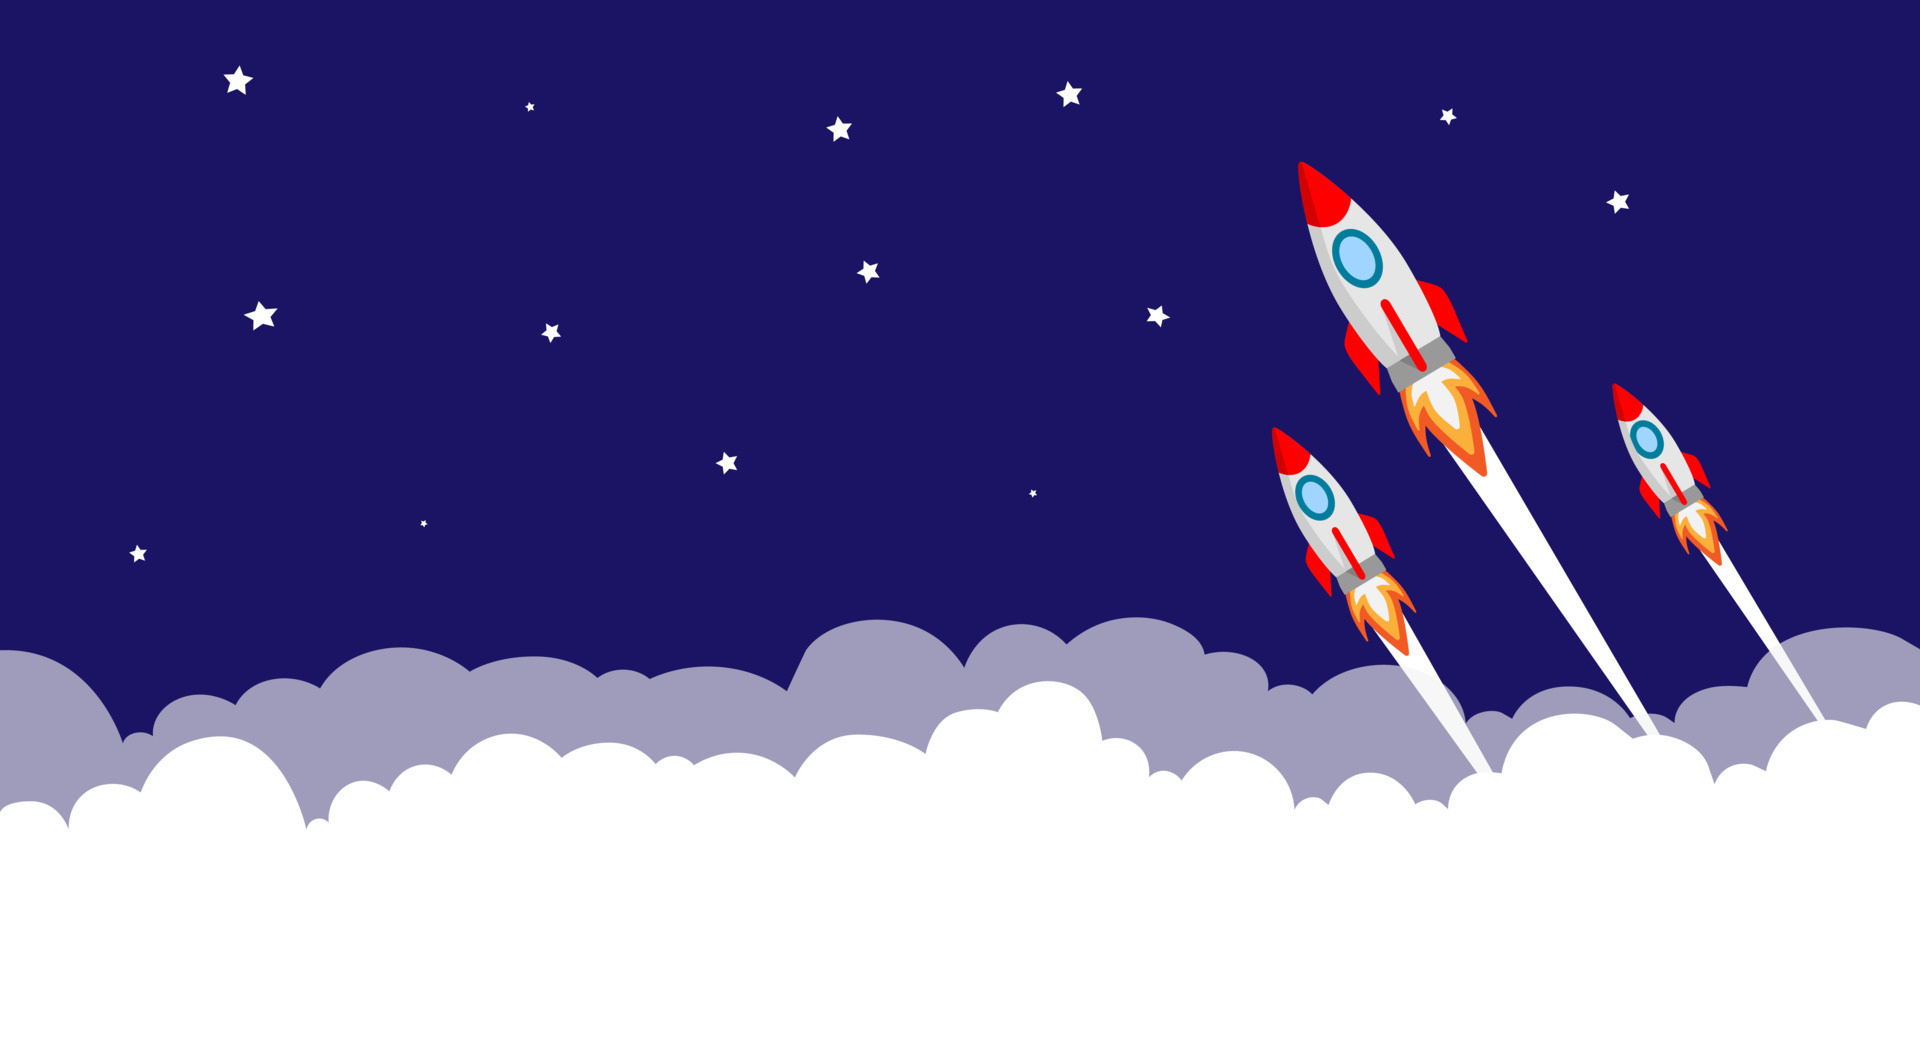


Hey there, fellow data explorers! Welcome aboard this wild ride through the world of daily dollar price trends. 🚀 We're about to dive deep into this dataset that's all about tracking the dollar's rollercoaster journey. And trust me, it's more than just numbers—it's like peeking into the heartbeat of the global economy!

In this notebook, we'll be using snazzy visualizations, number crunching, and a ton of data sorcery to uncover hidden patterns, trends, and maybe even a few surprises behind the dollar's day-to-day mood swings.

If you find my notebook useful, ***please*** **UPVOTE**

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## AR Model
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

### Loading the Data

In [2]:
df = pd.read_csv("/kaggle/input/ohlc-dollar-daily-price/Dolar_Raoofi_pyFinance.csv")

### Looking at the basic information of the features of this dataset

In [3]:
print("Here's some sample data to look at: ")
print()
print()
df.head(5)

Here's some sample data to look at: 




,J-Date,Date,Weekday,Open,High,Low,Close
0,1390-09-05,2011-11-26,Saturday,13700,13700,13700,13700
1,1390-09-06,2011-11-27,Sunday,13440,13440,13440,13440
2,1390-09-07,2011-11-28,Monday,13350,13350,13350,13350
3,1390-09-08,2011-11-29,Tuesday,13400,13400,13400,13400
4,1390-09-09,2011-11-30,Wednesday,13500,13500,13500,13500


Okay we have the dates in Islamic and Gregorian Calendars, Weekday, Open price,Low and Closing price;

When we have data of the same entity, like the Opening, Lowest, Highest, and Closing prices, collected at regular intervals like over days , it is called a **time series**

When we have time series, we can perform **time series analysis**; where we analyse the timestamp data to extract meaningful insights and predictions about the future --> forecast

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3769 entries, 0 to 3768
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   J-Date   3769 non-null   object
 1   Date     3769 non-null   object
 2   Weekday  3769 non-null   object
 3   Open     3769 non-null   int64 
 4   High     3769 non-null   int64 
 5   Low      3769 non-null   int64 
 6   Close    3769 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 206.2+ KB


In [5]:
print("Looking for any null values ?")
print()
df.isnull().sum()

Looking for any null values ?



J-Date     0
Date       0
Weekday    0
Open       0
High       0
Low        0
Close      0
dtype: int64

In [6]:
print("I'm going to stick to Gregorian Calendar")
df = df.drop(['J-Date'], axis=1)

I'm going to stick to Gregorian Calendar


Let's see the outliers of 'Open' , 'High' , 'Low' , and 'Close'

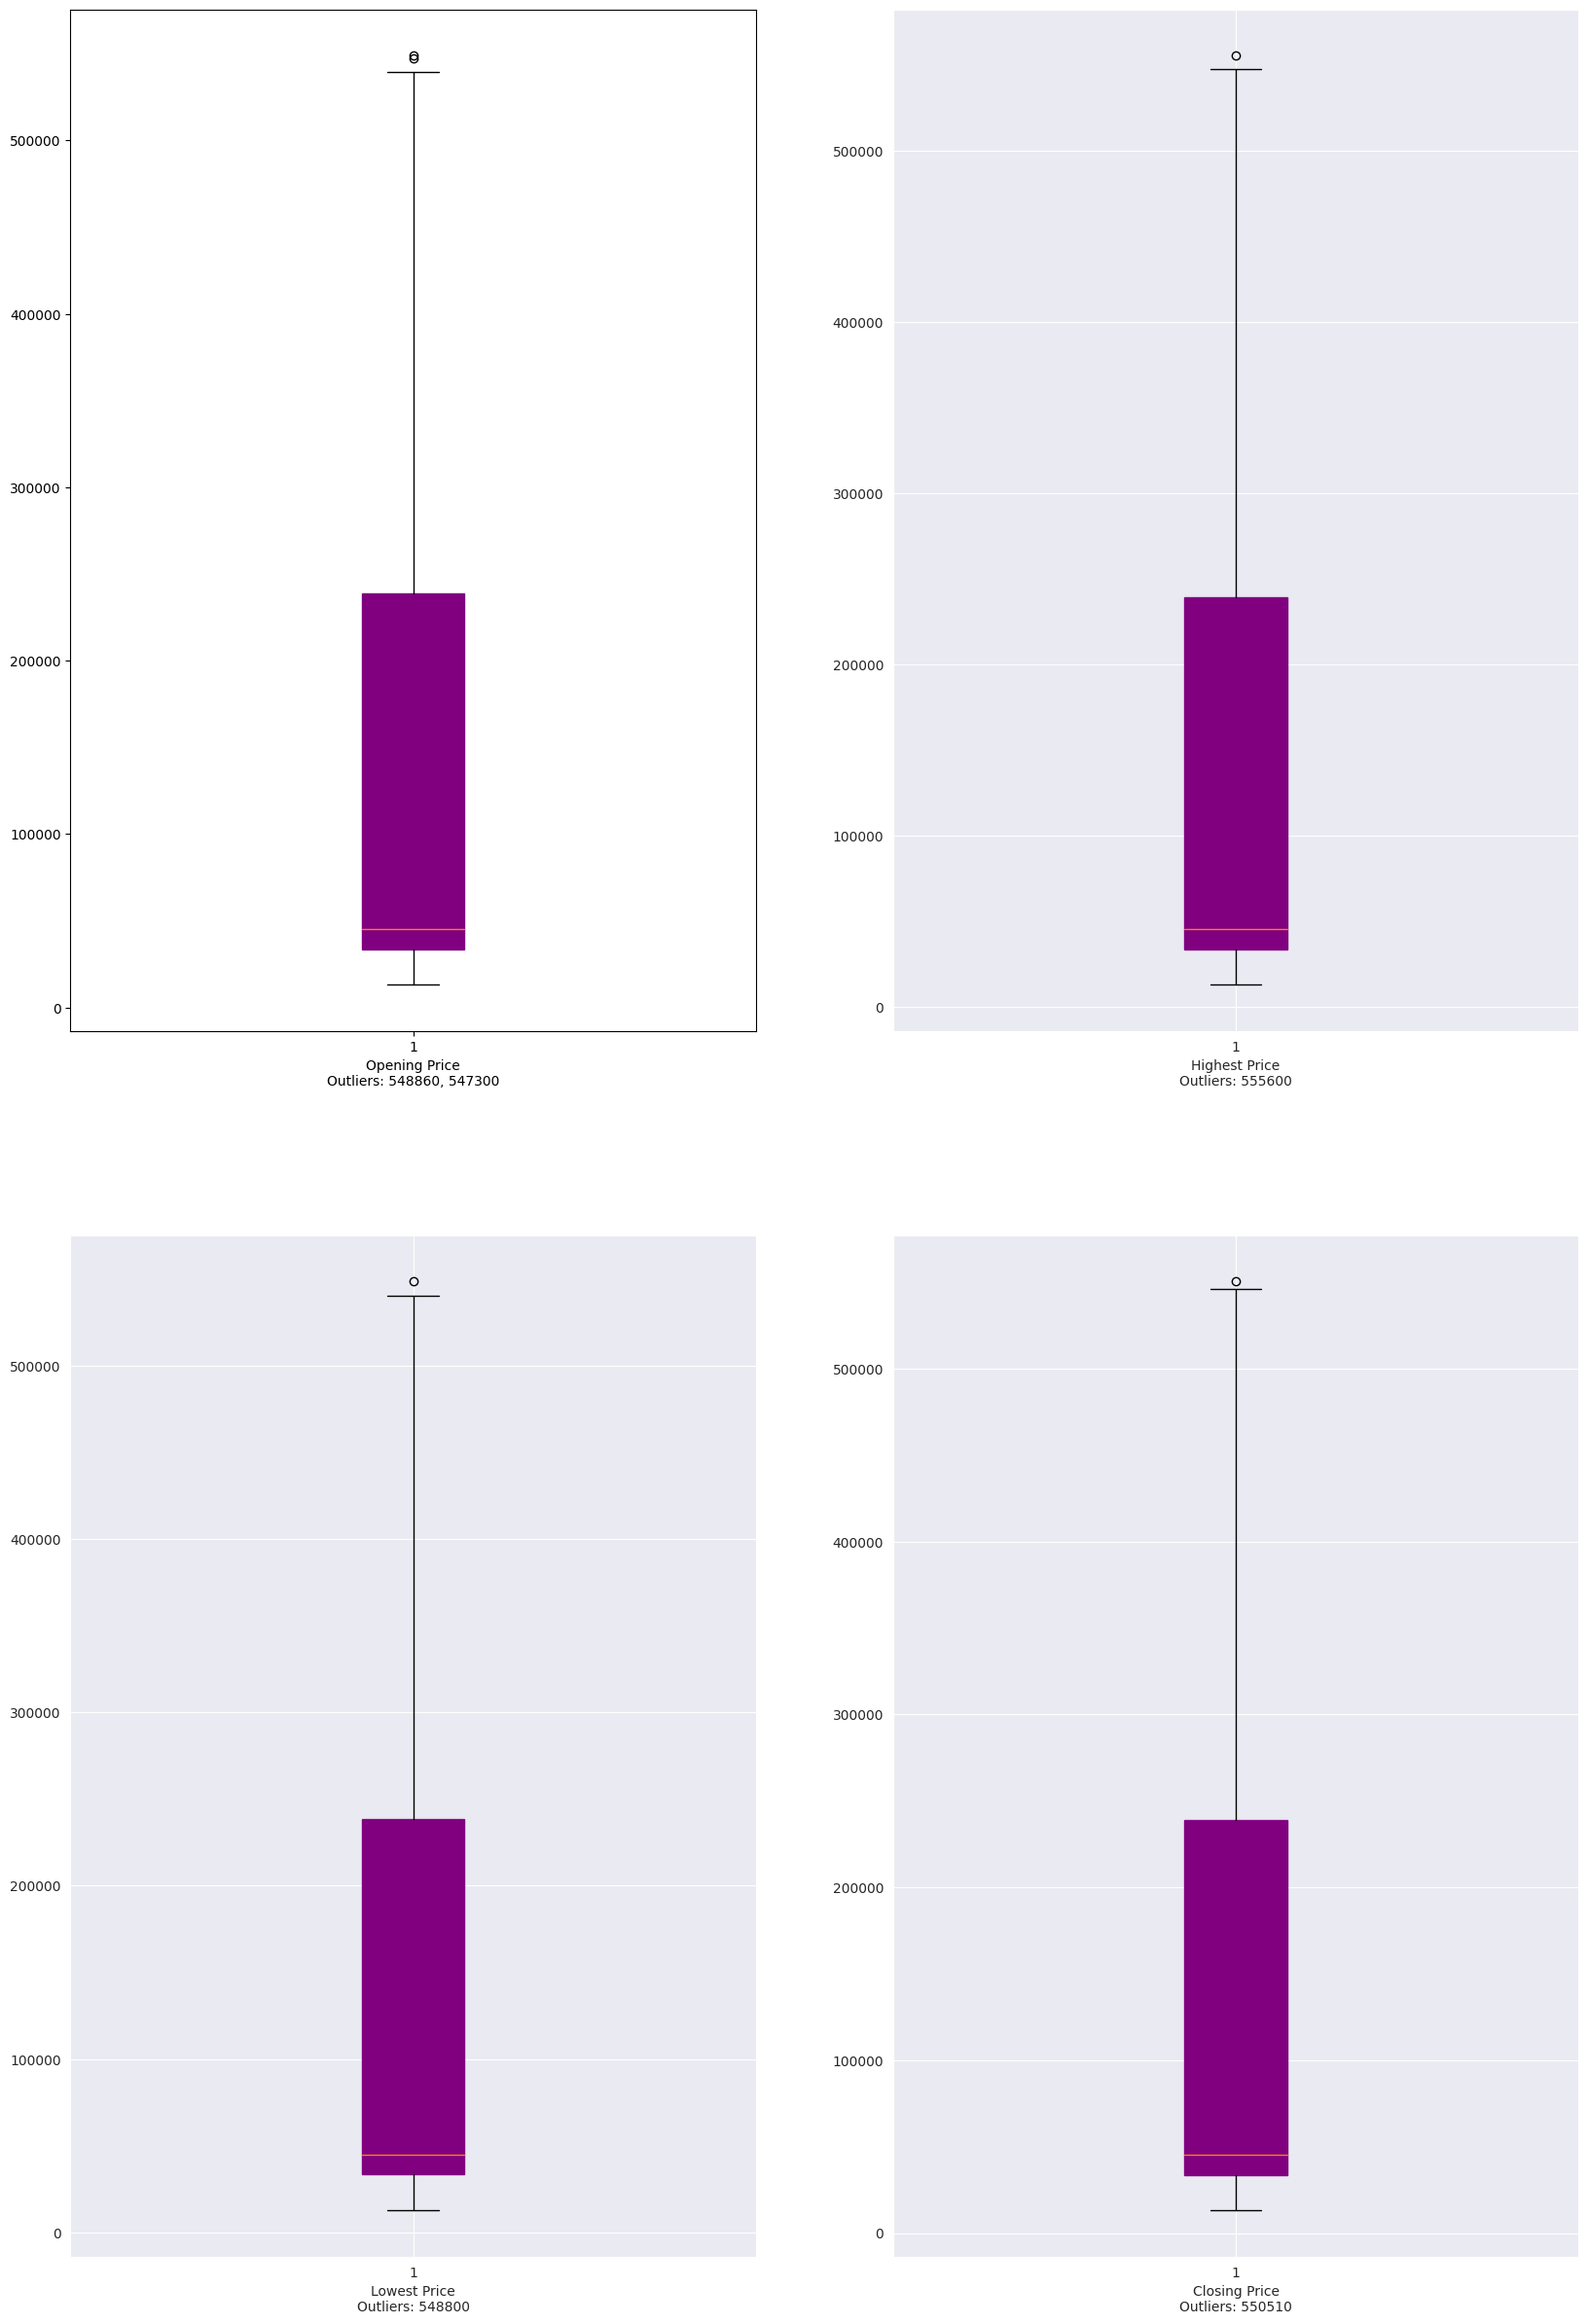

In [7]:
plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Open'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Opening Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 2)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['High'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Highest Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 3)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Low'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Lowest Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)

#####################################################################################################

plt.subplot(2, 2, 4)
sns.set_style('darkgrid')

# Create the boxplot and color the boxes
box = plt.boxplot(df['Close'], showfliers=True, patch_artist=True)

# Change the color of boxes and outliers
for box_element in ['boxes', 'fliers']:
    plt.setp(box[box_element], color='purple')  # Change box color to blue

# Extracting outliers using matplotlib's boxplot statistics
outliers = [flier.get_ydata() for flier in box['fliers']]

outlier_values = ", ".join([str(outlier) for sublist in outliers for outlier in sublist])
xlabel_text = 'Closing Price\nOutliers: ' + outlier_values

plt.xlabel(xlabel_text)


plt.show()

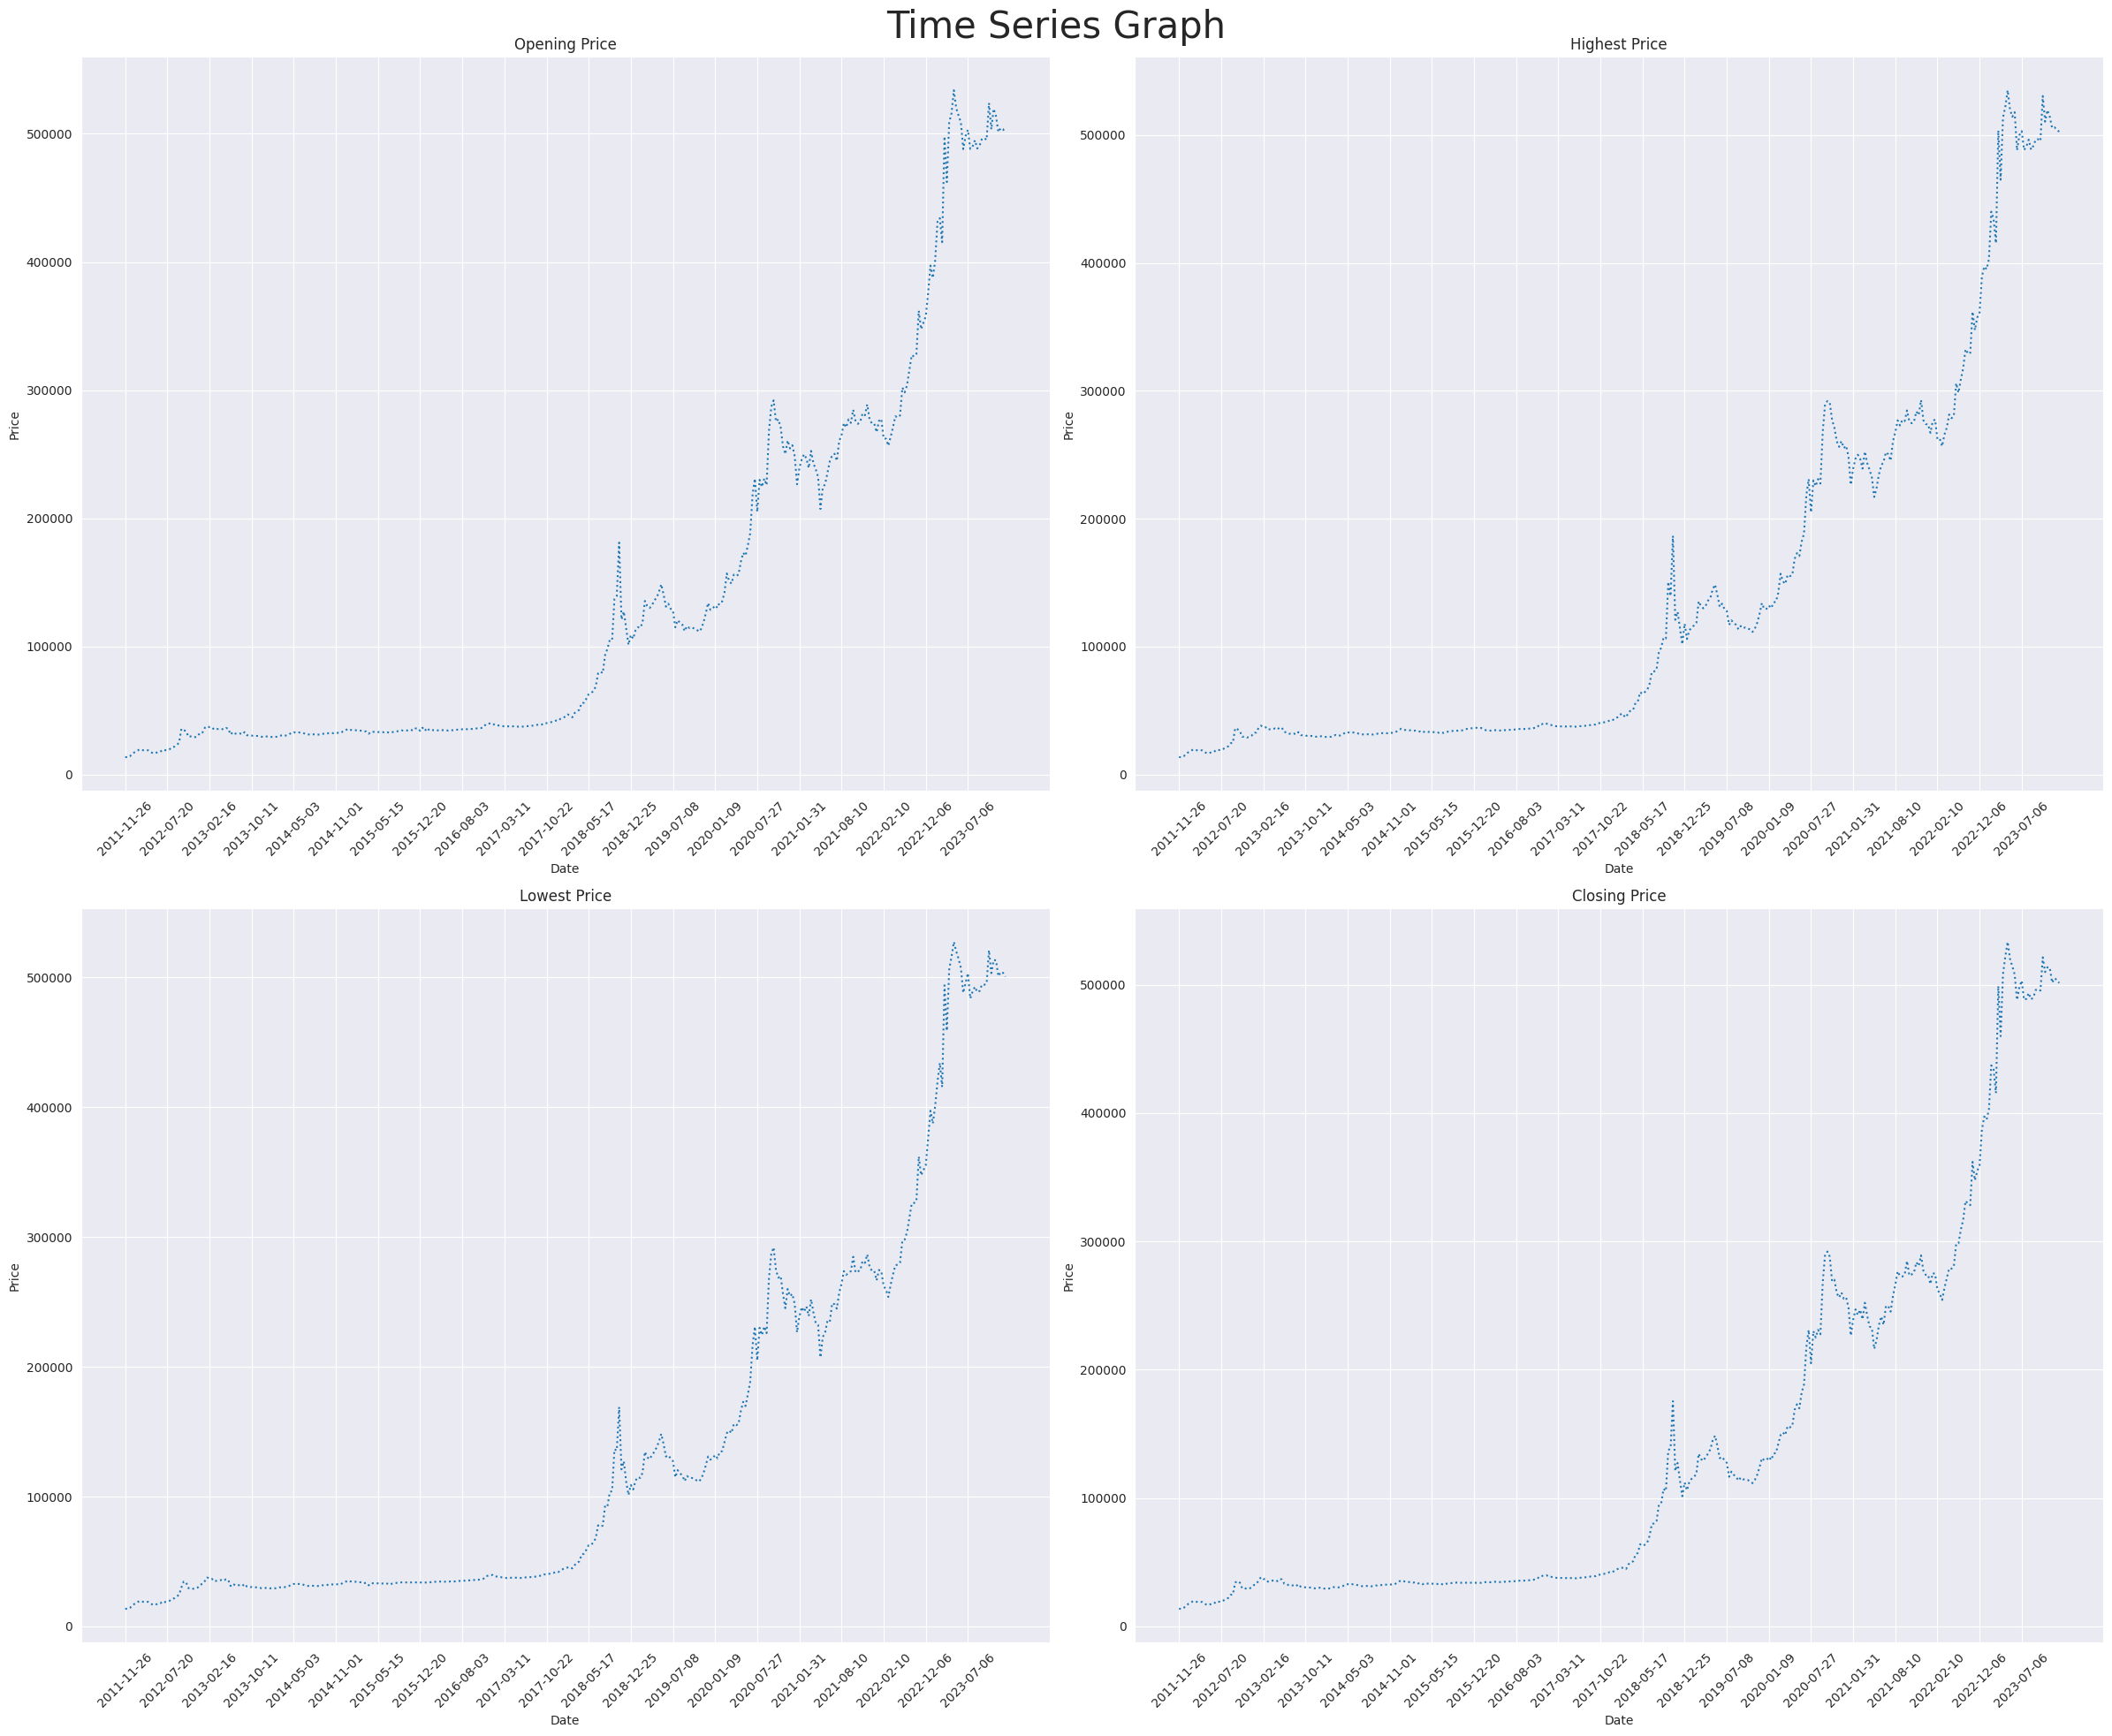

In [8]:
plt.figure(figsize=(24, 20))

plt.suptitle('Time Series Graph', fontsize=30)  # General title for the entire figure

plt.subplot(2, 2, 1)
plt.plot(df['Date'][::10], df['Open'][::10], linestyle='dotted')
plt.title("Opening Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 2)
plt.plot(df['Date'][::10], df['High'][::10], linestyle='dotted')
plt.title("Highest Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 3)
plt.plot(df['Date'][::10], df['Low'][::10], linestyle='dotted')
plt.title("Lowest Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.subplot(2, 2, 4)
plt.plot(df['Date'][::10], df['Close'][::10], linestyle='dotted')
plt.title("Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')
n = 20
plt.xticks(df['Date'][::10][::len(df['Date'][::10]) // n], rotation=45)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area properly
plt.show()

## Time Series Forecasting!!!



Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making. It’s not always an exact prediction, and likelihood of forecasts can vary wildly—especially when dealing with the commonly fluctuating variables in time series data as well as factors outside our control. However, forecasting insight about which outcomes are more likely—or less likely—to occur than other potential outcomes.

### 1. Components:
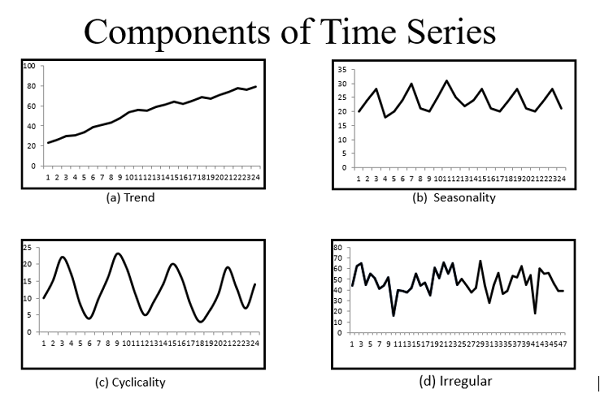
   
   
#### Trend: overall direction of data over time, whether its increasing, decreasing or staying the same
#### Seasonality: repeating pattern of data over a set period of time, like the way that retain sales spike during the holiday season
#### Cycle: repeating but non-seasonal patterns in the data, like the economic booms and bursts that happen over several years or decades
#### Variation/noise/irregularity: refers to unpredictable ups and downs in the data that cannot be explained by other components



### Autoregressive (AR): 

An autoregressive (AR) model predicts future behaviour based on past behaviour. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them.

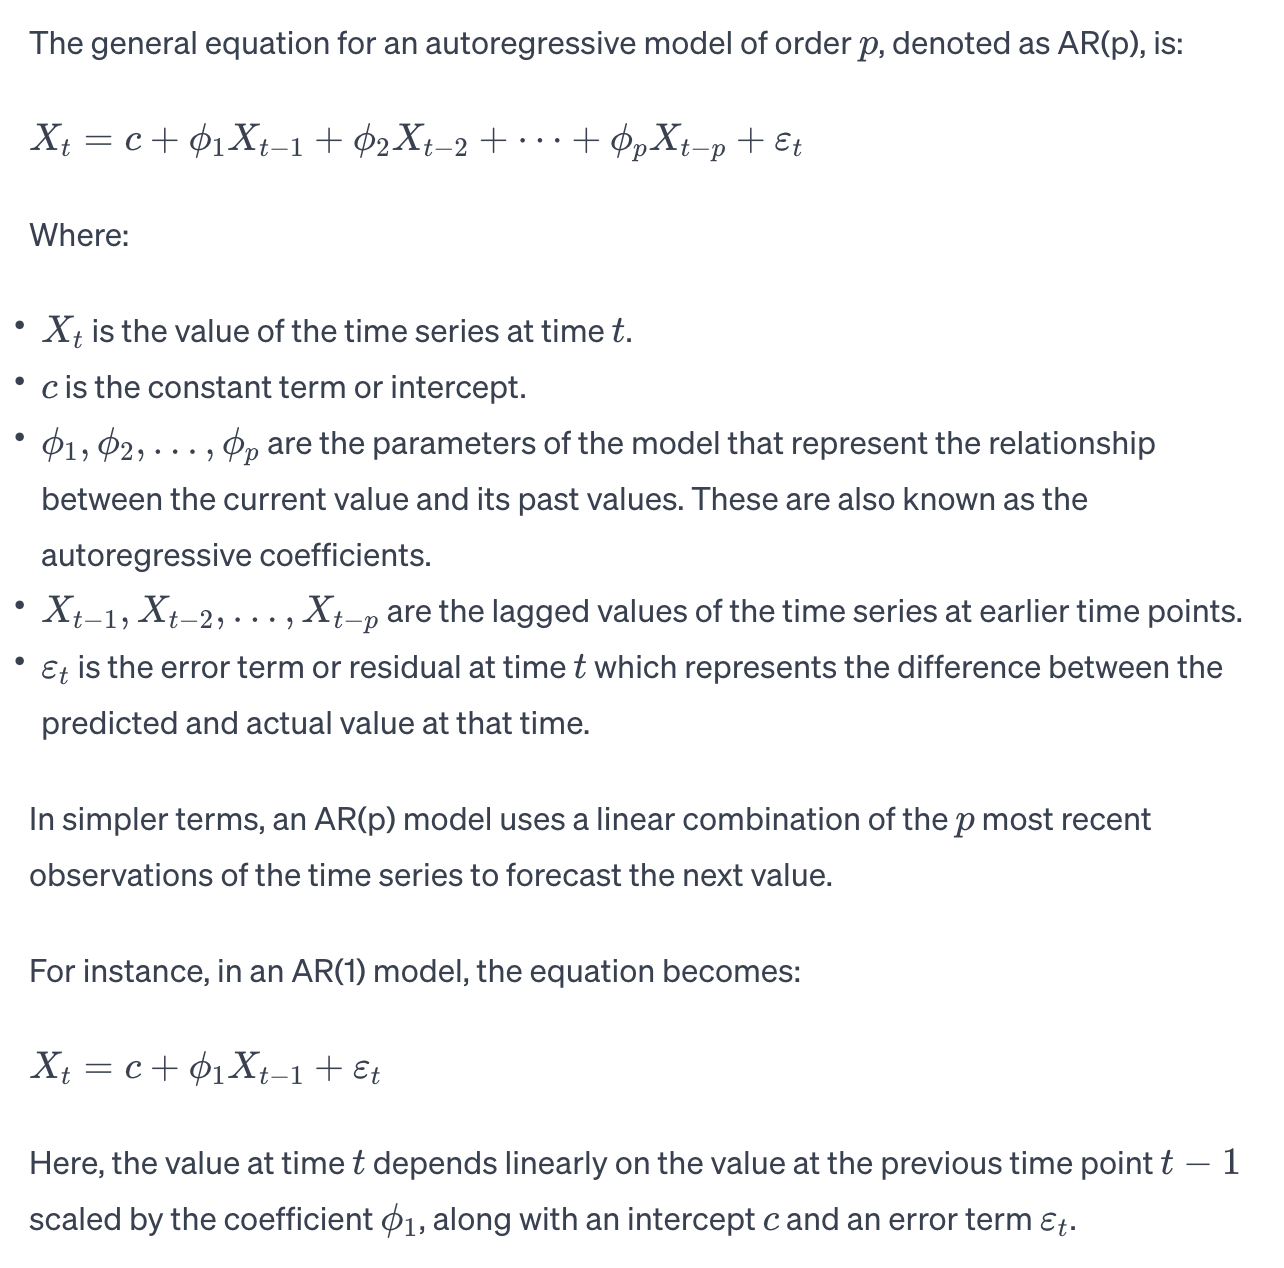
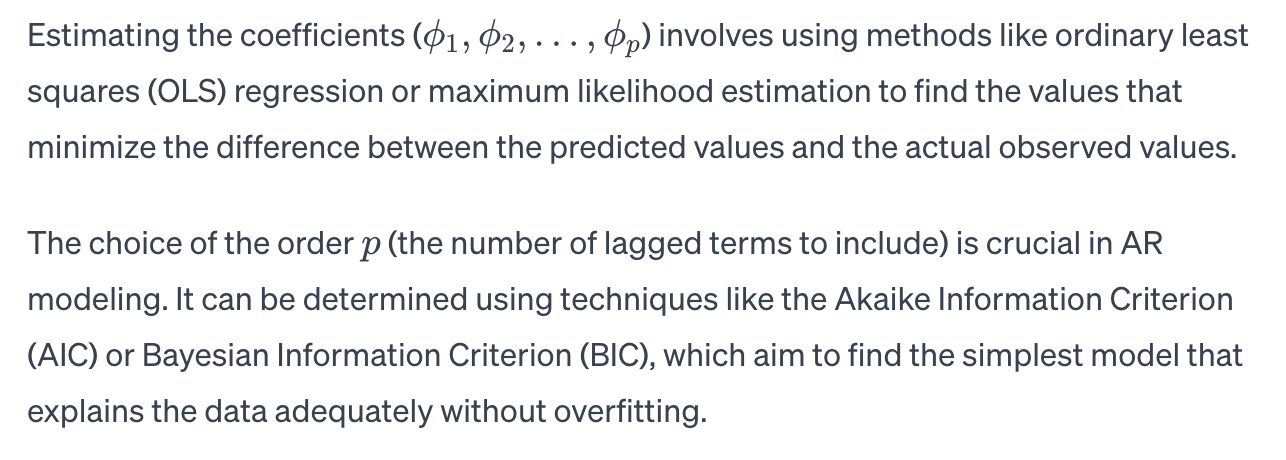

Before going ahead and training the AR model, the following will be needed to be found:

* **Stationarity of the time-series data:** Stationarity is a key concept in time series analysis. A stationary time series is one whose statistical properties like mean, variance, and autocorrelation remain constant over time. The adfuller test from the statsmodels.tsa.stattools module helps determine stationarity. It calculates the Augmented Dickey-Fuller test, where the null hypothesis is that the time series is non-stationary. If the resulting p-value is less than a chosen significance level (often 0.05), we reject the null hypothesis and infer that the series is stationary. A smaller p-value suggests stronger evidence against the null hypothesis

* **Order of AR model to be trained:** he Autoregressive (AR) model is a type of time series model that uses past values of the variable to predict future values. The order of the AR model, denoted as 'p,' determines how many past time steps are considered for prediction. To find the appropriate order for the AR model, the partial autocorrelation function (PACF) plot is used. The plot_pacf method from statsmodels.graphics.tsaplots helps visualize the partial autocorrelation. In the PACF plot, significant spikes beyond a certain lag indicate significant partial autocorrelation, suggesting the order of the AR model. The lag where the PACF plot cuts off into non-significant values helps determine the order 'p' for the AR model.

In [9]:
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
from statsmodels.tsa.stattools import adfuller

df_stationarityTest = adfuller(df['Open'], autolag='AIC')

print("P-value: ", df_stationarityTest[1])


P-value:  0.9984607919290526


A p-value of 0.9984607919290526, suggests strong evidence against stationarity. In this context, the null hypothesis of the test is likely to be accepted, indicating that the time series data is non-stationary.

When encountering such a high p-value:

* **Interpretation:** A high p-value (close to 1) indicates that there is insufficient evidence to reject the null hypothesis. Here, the null hypothesis often implies the presence of a unit root, suggesting non-stationarity in the time series.

* **Addressing Non-Stationarity:** Non-stationarity can arise due to trends, seasonality, or other patterns in the data. To make the time series stationary, you might need to apply transformations like differencing or take logarithms to stabilize variance or remove trends.

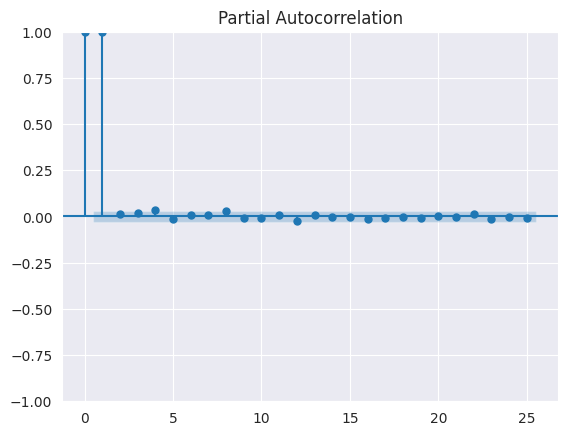

In [10]:
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Open'], lags=25)

### You've come this far... why not upvote and motivate me :/...